## ***Import the Libraries***

In [1]:
import pandas as pd
import numpy as np

## ***Load the dataset***

In [2]:
df=pd.read_csv('training.csv')

In [3]:
df.head()

,user,movie,rating,id
0,2783,1253,5,2783_1253
1,2783,589,5,2783_589
2,2783,1270,4,2783_1270
3,2783,1274,4,2783_1274
4,2783,741,5,2783_741


In [4]:
del df['id']
df.head()

,user,movie,rating
0,2783,1253,5
1,2783,589,5
2,2783,1270,4
3,2783,1274,4
4,2783,741,5


In [15]:
column_names = ['movie','Title','Genres']
movie= pd.read_csv('movies.dat', sep='::', names=column_names,encoding = "ISO-8859-1")

c:\users\mithunkumar s\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [13]:
movie.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
del movie['Genres']
movie.head()

,movie,Title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [17]:
df = pd.merge(df,movie,on='movie')
df.head()

,user,movie,rating,Title
0,2783,1253,5,"Day the Earth Stood Still, The (1951)"
1,2788,1253,4,"Day the Earth Stood Still, The (1951)"
2,2789,1253,4,"Day the Earth Stood Still, The (1951)"
3,2794,1253,5,"Day the Earth Stood Still, The (1951)"
4,2795,1253,4,"Day the Earth Stood Still, The (1951)"


## ***EDA***

In [38]:
df.groupby('Title')['rating'].mean().sort_values(ascending=False).head()

Title
Ulysses (Ulisse) (1954)                         5.0
Bittersweet Motel (2000)                        5.0
Return with Honor (1998)                        5.0
Sacco and Vanzetti (Sacco e Vanzetti) (1971)    5.0
Angela (1995)                                   5.0
Name: rating, dtype: float64

In [41]:
df.groupby('Title')['rating'].count().sort_values(ascending=False).head()

Title
American Beauty (1999)                                   1684
Star Wars: Episode V - The Empire Strikes Back (1980)    1585
Star Wars: Episode IV - A New Hope (1977)                1573
Star Wars: Episode VI - Return of the Jedi (1983)        1539
Back to the Future (1985)                                1396
Name: rating, dtype: int64

In [35]:
ratings = pd.DataFrame(df.groupby('Title')['rating'].mean())
ratings.head()

,rating
Title,
"$1,000,000 Duck (1971)",2.857143
'Night Mother (1986),3.302326
'Til There Was You (1997),2.818182
"'burbs, The (1989)",3.000000
...And Justice for All (1979),3.765217


In [42]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Title')['rating'].count())
ratings.head()

,rating,num of ratings
Title,,
"$1,000,000 Duck (1971)",2.857143,14
'Night Mother (1986),3.302326,43
'Til There Was You (1997),2.818182,22
"'burbs, The (1989)",3.000000,161
...And Justice for All (1979),3.765217,115


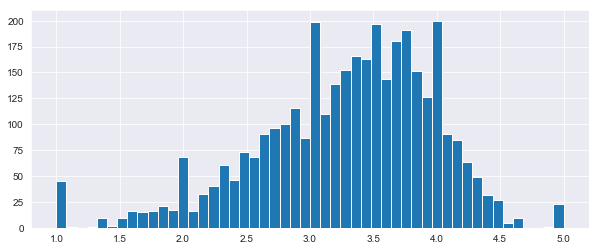

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=50)

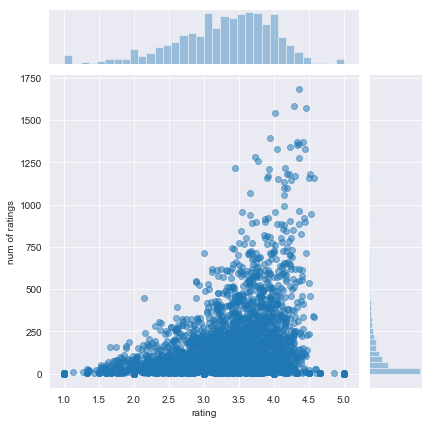

In [73]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

## ***Recommending Similar Movies***

In [44]:
recomend = df.pivot_table(index='user',columns='Title',values='rating')
recomend.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zeus and Roxanne (1997),eXistenZ (1999)
user,,,,,,,,,,,,,,,,,,,,,
2783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
Title,,
American Beauty (1999),4.364608,1684
Star Wars: Episode V - The Empire Strikes Back (1980),4.280757,1585
Star Wars: Episode IV - A New Hope (1977),4.464717,1573
Star Wars: Episode VI - Return of the Jedi (1983),4.016894,1539
Back to the Future (1985),3.944842,1396
"Matrix, The (1999)",4.335761,1373
"Sixth Sense, The (1999)",4.418554,1369
"Silence of the Lambs, The (1991)",4.352206,1360
Saving Private Ryan (1998),4.335551,1353


In [54]:
matrix_ratings = recomend['Matrix, The (1999)']
matrix_ratings.head()

user
2783    5.0
2784    NaN
2785    NaN
2786    5.0
2787    NaN
Name: Matrix, The (1999), dtype: float64

In [55]:
similar_to_matrix = recomend.corrwith(matrix_ratings)

c:\users\mithunkumar s\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\mithunkumar s\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [56]:
corr_matrix = pd.DataFrame(similar_to_matrix,columns=['Correlation'])
corr_matrix.dropna(inplace=True)
corr_matrix.head()

,Correlation
Title,
"$1,000,000 Duck (1971)",-0.334428
'Night Mother (1986),0.122474
'Til There Was You (1997),0.251478
"'burbs, The (1989)",0.101292
...And Justice for All (1979),0.061811


In [57]:
corr_matrix.sort_values('Correlation',ascending=False).head(10)

,Correlation
Title,
"Gnome-Mobile, The (1967)",1.0
Gold Diggers: The Secret of Bear Mountain (1995),1.0
Naked in New York (1994),1.0
Train of Life (Train De Vie) (1998),1.0
Destiny Turns on the Radio (1995),1.0
Sour Grapes (1998),1.0
Safe Passage (1994),1.0
Dreaming of Joseph Lees (1998),1.0
"Matrix, The (1999)",1.0


In [58]:
corr_matrix = corr_matrix.join(ratings['num of ratings'])
corr_matrix.head()

,Correlation,num of ratings
Title,,
"$1,000,000 Duck (1971)",-0.334428,14
'Night Mother (1986),0.122474,43
'Til There Was You (1997),0.251478,22
"'burbs, The (1989)",0.101292,161
...And Justice for All (1979),0.061811,115


In [59]:
corr_matrix[corr_matrix['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Title,,
"Matrix, The (1999)",1.000000,1373
"Killer, The (Die xue shuang xiong) (1989)",0.503387,117
Cat Ballou (1965),0.474723,107
In the Mouth of Madness (1995),0.467565,108
Road Trip (2000),0.457177,167


In [60]:
toy_story_ratings = recomend['Toy Story (1995)']
toy_story_ratings.head()

user
2783    NaN
2784    NaN
2785    NaN
2786    NaN
2787    5.0
Name: Toy Story (1995), dtype: float64

In [61]:
similar_to_toy_story = recomend.corrwith(toy_story_ratings)

In [62]:
corr_toy_story = pd.DataFrame(similar_to_toy_story,columns=['Correlation'])
corr_toy_story.dropna(inplace=True)
corr_toy_story.head()

,Correlation
Title,
"$1,000,000 Duck (1971)",0.142857
'Night Mother (1986),0.255417
'Til There Was You (1997),0.130466
"'burbs, The (1989)",-0.177002
...And Justice for All (1979),-0.073749


In [63]:
corr_toy_story = corr_toy_story.join(ratings['num of ratings'])
corr_toy_story.head()

,Correlation,num of ratings
Title,,
"$1,000,000 Duck (1971)",0.142857,14
'Night Mother (1986),0.255417,43
'Til There Was You (1997),0.130466,22
"'burbs, The (1989)",-0.177002,161
...And Justice for All (1979),-0.073749,115


In [64]:
corr_toy_story[corr_toy_story['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Title,,
Toy Story (1995),1.000000,1098
Toy Story 2 (1999),0.645226,700
Creature Comforts (1990),0.485597,129
Cat Ballou (1965),0.480322,107
My Dog Skip (1999),0.458125,112
